In [34]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict


%matplotlib inline
np.random.seed(1)

In [35]:
r = np.random.rand()
beta = r * 0.09 + 0.9
beta

0.9375319804232317

In [36]:
y_hat = tf.constant(36, name='y_hat')
y = tf.constant(39, name='y')

loss = tf.Variable((y-y_hat) ** 2, name='loss')

init = tf.global_variables_initializer()

with tf.Session() as session:
    session.run(init)
    print(session.run(loss))

9


In [37]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


In [38]:
sess = tf.Session()
print(sess.run(c))

20


In [39]:
x = tf.placeholder(tf.int64, name='x')
print(sess.run(2*x, feed_dict = {x:3}))
sess.close()

6


In [40]:
def linear_function():
    np.random.seed(1)
    
    X = tf.constant(np.random.randn(3,1), name='X')
    W = tf.constant(np.random.randn(4,3), name='W')
    b = tf.constant(np.random.randn(4,1), name='b')
    Y = tf.add(tf.matmul(W,X),b)
    
    sess = tf.Session()
    result = sess.run(Y)
    
    sess.close()
    
    return result

In [41]:
print( "result = " + str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


In [42]:
def sigmoid(z):
    x = tf.placeholder(tf.float32,name='x')
    sigmoid = tf.sigmoid(x)
    with tf.Session() as sess:
        result = sess.run(sigmoid,feed_dict={x:z})
        
    return result

In [43]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


In [44]:
def cost(logits, labels):
    z = tf.placeholder(tf.float32, name='logits')
    y = tf.placeholder(tf.float32, name='labels')
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z,labels=y)
    sess = tf.Session()
    cost = sess.run(cost, feed_dict = {z:logits,y:labels})
    sess.close()
    return cost

In [45]:
logits = sigmoid(np.array([0.2,0.4,0.7,0.9]))
#logits = np.array([0.2,0.4,0.7,0.9])

cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

cost = [1.0053872  1.0366409  0.41385433 0.39956614]


In [46]:
def one_hot_matrix(labels, C):
    C = tf.constant(C, name='C')
    one_hot_matrix = tf.one_hot(labels,C,axis=0)
    sess = tf.Session()
    one_hot = sess.run(one_hot_matrix)
    sess.close()
    return one_hot

In [47]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [48]:
def ones(shape):
    ones = tf.ones(shape)
    sess = tf.Session()
    ones = sess.run(ones)
    sess.close()
    return ones

In [49]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


In [50]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 2


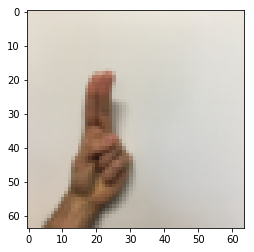

In [51]:
index = 10
plt.imshow(X_train_orig[index])
print('y = ' + str(np.squeeze(Y_train_orig[:,index])))

In [52]:
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0],-1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0],-1).T
X_train = X_train_flatten/255
X_test = X_test_flatten/255
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)
print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


In [53]:
def create_placeholders(n_x, n_y):
    X = tf.placeholder(shape=[n_x,None],dtype=tf.float32)
    Y = tf.placeholder(shape=[n_y,None],dtype=tf.float32)
    return X,Y

In [54]:
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder_2:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Placeholder_3:0", shape=(6, ?), dtype=float32)


In [55]:
def initialize_parameters():
    tf.set_random_seed(1)
    W1 = tf.get_variable("W1",[25,12288],initializer = tf.contrib.layers.xavier_initializer(seed=1))
    W2 = tf.get_variable("W2",[12,25],initializer = tf.contrib.layers.xavier_initializer(seed=1))
    W3 = tf.get_variable("W3",[6,12],initializer = tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable('b1',[25,1],initializer=tf.zeros_initializer())
    b2 = tf.get_variable('b2',[12,1],initializer=tf.zeros_initializer())
    b3 = tf.get_variable('b3',[6,1],initializer=tf.zeros_initializer())
    
    
    parameters = {
        'W1':W1,
        'b1':b1,
        'W2':W2,
        'b2':b2,
        'W3':W3,
        'b3':b3
    }
    return parameters

In [56]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


In [57]:
def forward_propagation(X,parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.matmul(W1,X) + b1
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)
    return Z3

In [58]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


In [59]:
# GRADED FUNCTION: compute_cost 

def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    ### END CODE HERE ###
    
    return cost

In [60]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [66]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001, num_epochs = 1500, minibatch_size = 32, print_cost = True):
    
    ops.reset_default_graph()
    
    tf.set_random_seed(1)
    seed = 3
    (n_x, m) = X_train.shape
    n_y = Y_train.shape[0]
    costs = []
    X, Y = create_placeholders(n_x, n_y)
    
    parameters = initialize_parameters()
    
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(num_epochs):
            epoch_cost = 0
            num_minibatches = int(m/minibatch_size)
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            
            
            
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                
                _, minibatch_cost = sess.run([optimizer, cost], feed_dict = {X:minibatch_X,Y:minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches
            
            if print_cost == True and epoch % 100 == 0:
                print('Cost after epoch %i: %f' % (epoch,epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
        
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations(per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        parameters = sess.run(parameters)
        
        print("parameters have been trained!")
        
        correct_prediction = tf.equal(tf.argmax(Z3),tf.arg_max(Y))
        
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        
        print("Train Accuracy", accuracy.eval({X:X_train, Y:Y_train}))
        print("Test Accuracy", accuracy.eval({X:X_test, Y:Y_test}))
        
        return parameters


In [ ]:
parameters = model(X_train, Y_train, X_test, Y_test)

Cost after epoch 0: 1.855702
Cost after epoch 100: 1.016458
Cost after epoch 200: 0.733102
Cost after epoch 300: 0.572941
Cost after epoch 400: 0.468690
Cost after epoch 500: 0.381061
Cost after epoch 600: 0.313809


In [ ]:
import scipy
from PIL import Image
from scipy import ndimage

## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "thumbs_up.jpg"
## END CODE HERE ##

# We preprocess your image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
image = image/255.
my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))




